In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.python.framework import ops
from mnist import MNIST

In [2]:
mndata = MNIST('sample')
X, y = mndata.load_training()

In [3]:
X_data = np.array(X)
y = np.array(y)
y_train1 = y.reshape(y.shape[0],1)
y_train1 = to_categorical(y_train1)

In [4]:
print (X_data.shape,y_train1.shape)

(60000, 784) (60000, 10)


In [5]:
X_image = X_data.reshape((X_data.shape[0],28,28,1))
print (X_image.shape,y_train1.shape)

(60000, 28, 28, 1) (60000, 10)


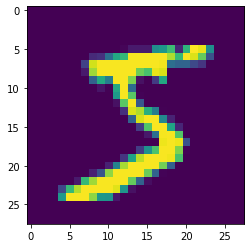

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
plt.imshow(X_image[0,:,:,0], interpolation='nearest')
plt.show()
print (y_train1[0])

In [7]:
ratio = int(0.95*X_image.shape[0])

X_train = X_image
y_train = y_train1
X_test = X_image[ratio:]
y_test = y_train1[ratio:]

X_train = X_train/255
X_test = X_test /255

print (X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000, 10) (3000, 28, 28, 1) (3000, 10)


In [13]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_3 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [18]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 3000 samples
Epoch 1/10
60000/60000 [==============================] - 46s 774us/sample - loss: 0.1218 - accuracy: 0.9630 - val_loss: 0.0395 - val_accuracy: 0.9887
Epoch 2/10
60000/60000 [==============================] - 46s 765us/sample - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.0313 - val_accuracy: 0.9927
Epoch 3/10
60000/60000 [==============================] - 46s 772us/sample - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0164 - val_accuracy: 0.9973
Epoch 4/10
60000/60000 [==============================] - 46s 770us/sample - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0168 - val_accuracy: 0.9963
Epoch 5/10
60000/60000 [==============================] - 46s 771us/sample - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0146 - val_accuracy: 0.9970
Epoch 6/10
60000/60000 [==============================] - 47s 775us/sample - loss: 0.0169 - accuracy: 0.9942 - val_loss: 0.0149 - val_accuracy: 0.9960
Epoch 7/10
60000/60000 [=====================

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

3000/3000 [==============================] - 1s 188us/sample - loss: 0.0089 - accuracy: 0.9980
Test loss 0.00889551233771518
Test accuracy 0.998


In [55]:
def resize1(arr):
    w = int(np.size(arr,0) / 28)
    h = int(np.size(arr,1) / 28)
    #print (w,h)
    img = np.zeros((28,28))
    IMG = np.zeros((784,1))
    h1 = w1 = 0
    h2 = h
    w2 = w
    count = 0
    for i in range(0,28):
        for j in range(0,28):
            img[i,j] = np.average(arr[w1:w2,h1:h2])
            h1 = h2
            h2 = h2 + h
        h1 = 0
        h2 = h
        w1 = w2
        w2 = w2 + w
    for i in range(0,28):
        for j in range(0,28):
            IMG[count] = img[j,i]
            count = count + 1
    return IMG,img

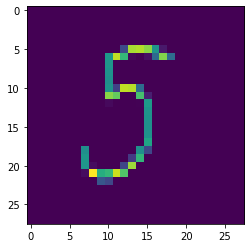

5


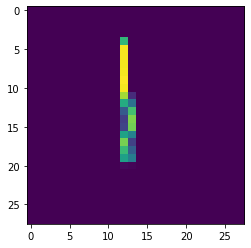

1


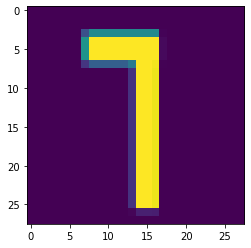

1


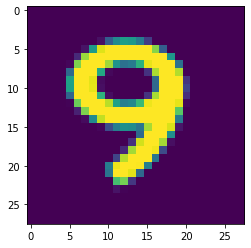

9


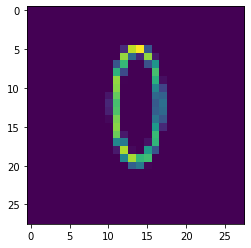

0


In [60]:
i =1
while( i<6):
    i = i + 1
    arr = plt.imread('Number'+str(i)+'.png')
    IMG,pic = resize1(arr)
    pic = 1- pic
    pic = pic/np.max(pic)
    plt.imshow(pic, interpolation='nearest')
    plt.show()
    prediction = model.predict(pic.reshape((1,28,28,1)))
    print(np.argmax(np.round(prediction[0])))